ImageNet example

* You should have images in './data/images/'

# Loading label (imagenet class names)

In [14]:
import csv
import os
import matplotlib.pyplot as plt
from PIL import Image

BASE_DIR = 'base_dir'
DATA_DIR = os.path.join(BASE_DIR, 'data')
RESULTS_DIR = os.path.join(BASE_DIR, 'results')
name_file = os.path.join(DATA_DIR, 'imagenet_install/class_names.csv')

imagenet_class  = {}
file_in = csv.reader(open(name_file))
for row in file_in:
  imagenet_class[int(row[0])] = row[1]

imagenet_class

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

# Classification of a single image

In [ ]:
# !pip install munch
# !pip install pretrainedmodels

# # remember to comment or delete this code after installation

  Using cached pretrainedmodels-0.7.4.tar.gz (58 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=7afd39ade2a5edbbaf18cee74075c020e8b72753a4858da4386cda51b4414491
  Stored in directory: /Users/chu-ingyu/Library/Caches/pip/wheels/4c/01/56/40a48f75dbdfe167a0cb70d3b48913369a00ec5c4e9fed5f2b
Successfully built pretrainedmodels


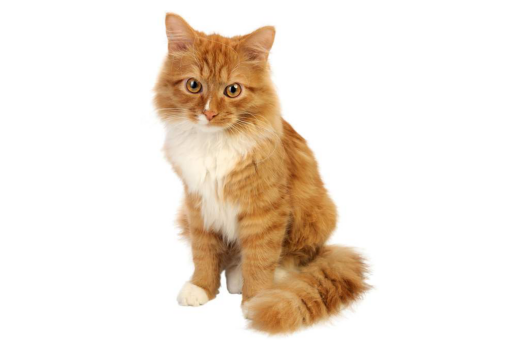

base_dir/data/images/cat_224.jpg is [281: tabby, tabby cat]


In [16]:
import torch
import sys
sys.path.append(os.path.join(DATA_DIR, 'imagenet_install/test_1'))

try:
  model # does exist
except NameError: # model does not exist
  import pretrainedmodels.utils as utils
  model = torch.load(os.path.join(RESULTS_DIR, 'imagenet_nasnetalarge.pth'), weights_only=False)
  load_img = utils.LoadImage()
  tf_img = utils.TransformImage(model)

# your file name
img_file = os.path.join(DATA_DIR, 'images/cat_224.jpg')

input_img = load_img(img_file)
input_tensor1 = tf_img(input_img)
input_tensor2 = input_tensor1.unsqueeze(0)

output_logits = model(input_tensor2) # 1x1000

# Visualize
img_display = Image.open(img_file) # Fill in the blank
plt.imshow(img_display)
plt.axis('off')
plt.show()

print("{} is [{}: {}]".format(img_file, output_logits.argmax(), imagenet_class[int(output_logits.argmax())])) # Fill in the blank (two missing are the same variable)

In [17]:
# checking size
print(input_tensor1.size())
print(input_tensor2.size())
print(output_logits.size())

torch.Size([3, 331, 331])
torch.Size([1, 3, 331, 331])
torch.Size([1, 1000])


# Classification of all the files in a directory './data/images/'

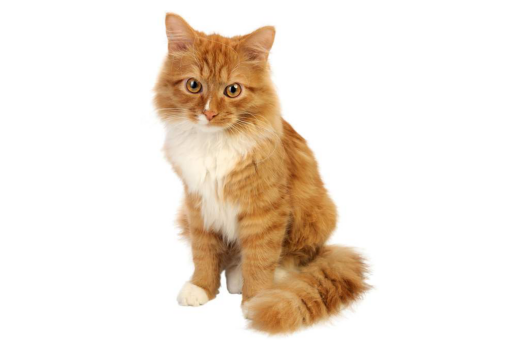

cat_224.jpg is [281: tabby, tabby cat]


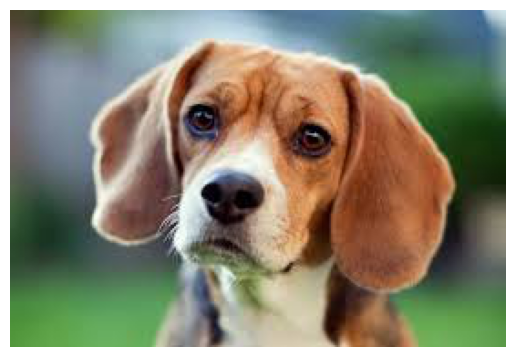

beagle_web_1.jpg is [162: beagle]


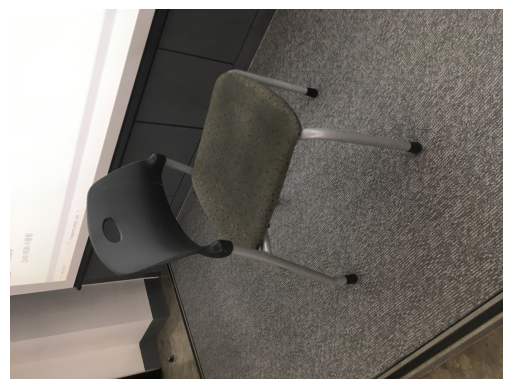

IMG_7543.JPG is [559: folding chair]


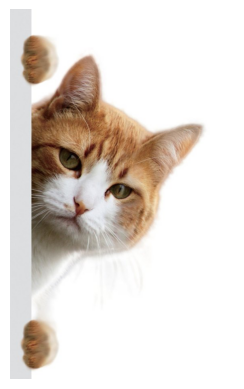

cat_2.jpg is [282: tiger cat]


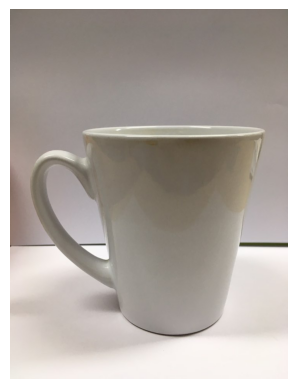

KakaoTalk_20191010_180310925.jpg is [504: coffee mug]


In [19]:
try:
  model # does exist
except NameError: # model does not exist
  import pretrainedmodels.utils as utils
  model = torch.load(os.path.join(RESULTS_DIR, 'imagenet_nasnetalarge.pth'))
  load_img = utils.LoadImage()
  tf_img = utils.TransformImage(model)

import glob
dir_path = os.path.join(DATA_DIR, 'images/')
img_list = glob.glob(dir_path+'*.*')

import matplotlib.pyplot as plt
for img_file in img_list:
  input_img = load_img(img_file)
  input_tensor1 = tf_img(input_img)
  input_tensor2 = input_tensor1.unsqueeze(0)
  output_logits = model(input_tensor2) # 1x1000

  # Visualize
  img_display = Image.open(img_file) # Fill in the blank
  plt.imshow(img_display)
  plt.axis('off')
  plt.show()

  print("{} is [{}: {}]".format(img_file.split('/')[-1], output_logits.argmax(), imagenet_class[int(output_logits.argmax())])) # Fill in the blank (take the hint from the above answer)